# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy.testing as testing

# Loading and Exploring Data

In [4]:
df=pd.read_csv("C:\\Users\\works\\Downloads\\python_dataset\\Student_Performance.csv")

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
df.shape

(10000, 6)

In [7]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [8]:
df.value_counts()

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  Sample Question Papers Practiced  Performance Index
5              59               Yes                         9            0                                 45.0                 3
1              97               Yes                         4            5                                 73.0                 2
               83               No                          7            2                                 58.0                 2
3              66               No                          4            6                                 45.0                 2
4              70               Yes                         6            8                                 53.0                 2
                                                                                                                               ..
3              98               Yes                         8            3                     

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [10]:
df.describe

<bound method NDFrame.describe of       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

     

# Checking null values 

In [11]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

# Checking duplicate values

In [12]:
df.duplicated().sum()

127

In [13]:
df.drop_duplicates(inplace=True )

In [14]:
df.duplicated().sum()

0

In [15]:
df.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [20]:
print(f'Extracurricular_Activities: {df["Extracurricular_Activities"].unique()}')

Extracurricular_Activities: ['Yes' 'No']


# Renaming Columns

In [19]:
df=df.rename(columns={"Hours Studied":"Hours_Studied","Previous Scores":"Previous_Scores","Extracurricular Activities":"Extracurricular_Activities",
                      "Sleep Hours":"Sleep_Hours","Sample Question Papers Practiced":"Sample_Question_Papers_Practiced","Performance Index":"Performance"})

In [21]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [22]:
df1=df.copy()

In [23]:
df1=pd.get_dummies(df,columns=["Extracurricular_Activities"],dtype=int)

In [57]:
df1["Extracurricular_Activities"]=np.where(df["Extracurricular_Activities"]=="Yes",1,0)

In [58]:
df1.head()

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced,Performance,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Extracurricular_Activities
0,7,99,9,1,91.0,0,1,1
1,4,82,4,2,65.0,1,0,0
2,8,51,7,2,45.0,0,1,1
3,5,52,5,2,36.0,0,1,1
4,7,75,8,5,66.0,1,0,0


# Outlier treatment

In [68]:
df1.columns

Index(['Hours_Studied', 'Previous_Scores', 'Sleep_Hours',
       'Sample_Question_Papers_Practiced', 'Performance',
       'Extracurricular_Activities_No', 'Extracurricular_Activities_Yes',
       'Extracurricular_Activities'],
      dtype='object')

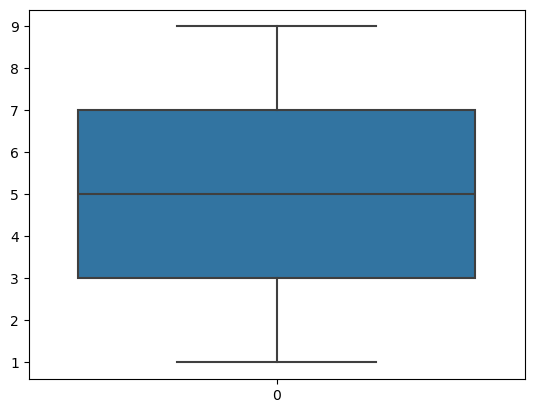

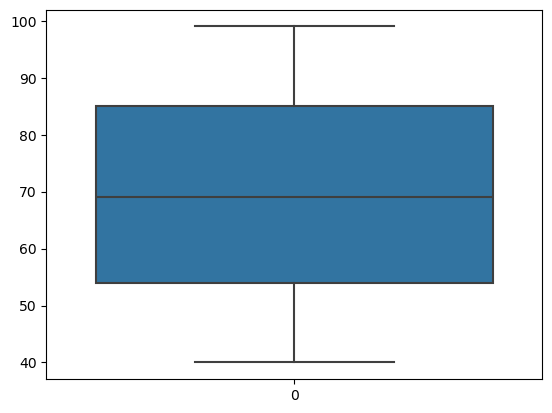

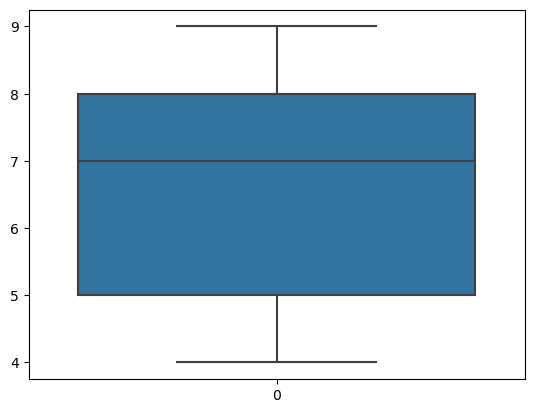

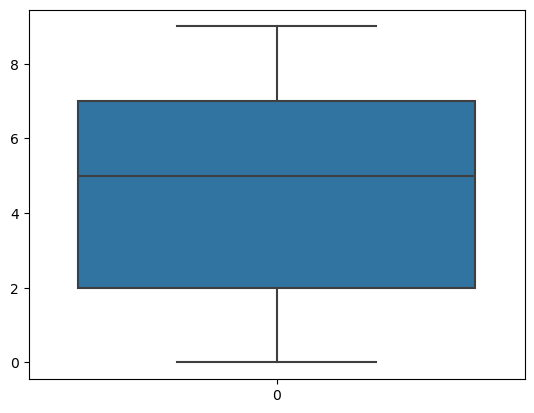

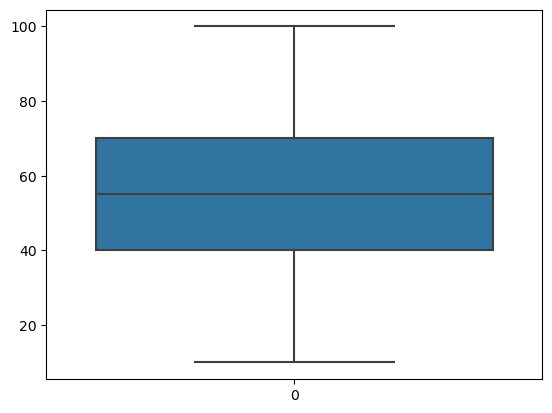

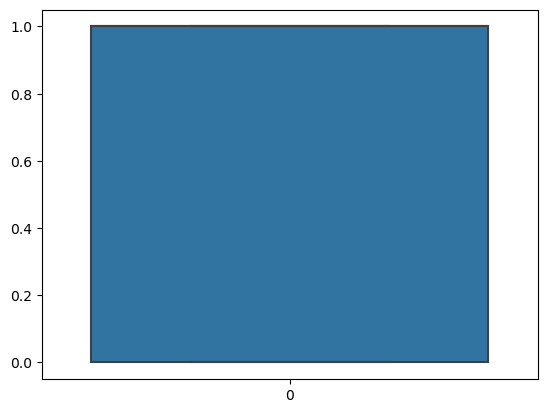

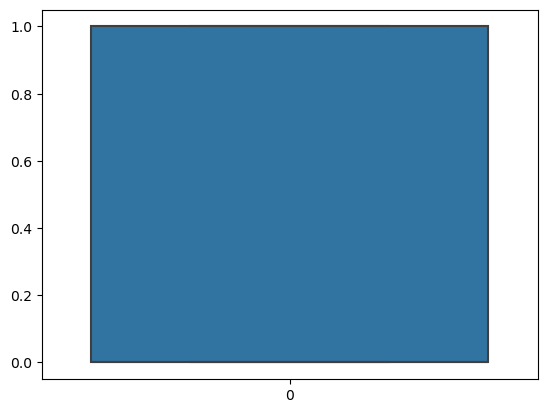

In [25]:
for i in df1.columns:
    sns.boxplot(df1[i])
    plt.show()

# Splitting data into X and Y axis

In [26]:
x=df1.drop(["Performance"],axis=1)
y=df1["Performance"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=51)

# Prediction using Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr=LinearRegression()

In [31]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
pred=lr.predict(x_test)

In [36]:
pred2=lr.predict(x_train)

# Importing Metrics

In [37]:
from sklearn.metrics import mean_squared_error,r2_score

In [81]:
print(mean_squared_error(y_test,pred))

4.292656108996311


In [38]:
print(mean_squared_error(y_train,pred))

4.148073432409771


In [82]:
print(r2_score(y_test,pred))

0.9886507540500781


In [39]:
print(r2_score(y_train,pred))

0.9886839835643363
